# Clustering Loan Data to predict Loan Status

Importing required libraries

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [ ]:
#calling the DataSet
loan= pd.read_csv("loan_train.csv")

In [9]:
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [10]:
#selecting the desired columns from the DataSet
loan = loan[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome']]

In [11]:
loan.dtypes

Gender             object
Married            object
Dependents         object
Education          object
Self_Employed      object
ApplicantIncome     int64
dtype: object

from above it is evident that we have to convert the non-numeric columns into numeric one

In [12]:
loan.isnull().sum()

Gender             13
Married             3
Dependents         15
Education           0
Self_Employed      32
ApplicantIncome     0
dtype: int64

### So we have to combat with the null-values in order to do further work,

so lets do it

In [13]:
# Filling the null values in 'Gender', 'Married' ,'Dependents' ,'Self_Employed' via "MODE"

In [14]:
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace = True)

In [15]:
loan['Married'].fillna(loan['Married'].mode()[0],inplace = True)

In [16]:
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace = True)

In [17]:
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace = True)

In [18]:
loan.isnull().sum()

Gender             0
Married            0
Dependents         0
Education          0
Self_Employed      0
ApplicantIncome    0
dtype: int64

#### so now we have filled all the null-values

In [19]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome
0,Male,No,0,Graduate,No,5849
1,Male,Yes,1,Graduate,No,4583
2,Male,Yes,0,Graduate,Yes,3000
3,Male,Yes,0,Not Graduate,No,2583
4,Male,No,0,Graduate,No,6000
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900
610,Male,Yes,3+,Graduate,No,4106
611,Male,Yes,1,Graduate,No,8072
612,Male,Yes,2,Graduate,No,7583


#### In order to cluster our Data we have to Encode the data between 0 and 1

In [20]:
#importing LabelEncoder from Sklearn library
from sklearn.preprocessing import LabelEncoder


In [21]:
lb= LabelEncoder()

In [22]:
# Performing fit_transform function to our selected columns for encoding them..

In [23]:
loan['Gender'] = lb.fit_transform(loan['Gender'])

In [24]:
loan['Married'] = lb.fit_transform(loan['Married'])

In [25]:
loan['Dependents'] = lb.fit_transform(loan['Dependents'])

In [26]:
loan['Education'] = lb.fit_transform(loan['Education'])

In [27]:
loan['Self_Employed'] = lb.fit_transform(loan['Self_Employed']) 

In [28]:
# storing our "loan" DataSet into 'x' for our convinience
X=loan

#### Importing KMeans to cluster our Data

In [29]:
from sklearn.cluster import KMeans

In [30]:
k_range = range(1,11)
inertia_valus = []
for k in k_range:
  kmeans = KMeans(n_clusters=k,random_state = 42)
  kmeans.fit(X)
  inertia_valus.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [31]:
inertia_valus

[22877400203.820847,
 9081137629.215343,
 4132738977.8538256,
 2699562875.3109684,
 1440730876.4030926,
 955657637.990824,
 707930174.8908241,
 531662124.7592806,
 403552146.72658074,
 327866770.9701435]

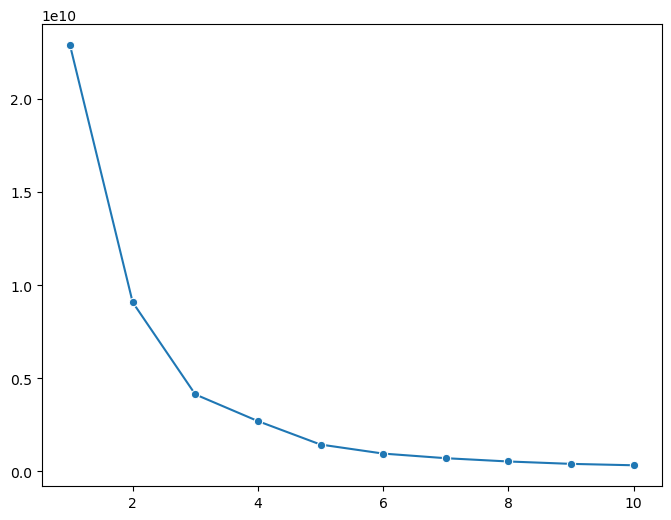

In [32]:
# by using elbow method we can easily find the number of clusters in whoch we have to divide our data
plt.figure(figsize=(8,6))
sns.lineplot(x = k_range,y = inertia_valus,marker = 'o')
plt.show()

from the above graph we came to the conclusion that  number of cluster should be '5'

In [33]:
km = KMeans(n_clusters=5)

In [36]:
# fitting our X data
km.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=5)

In [37]:
# predicting
km.predict(X)

array([0, 4, 4, 4, 0, 0, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0,
       4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4,
       0, 0, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 0, 0, 4, 4,
       0, 4, 4, 0, 4, 2, 4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 2, 4, 0, 0, 2, 4,
       4, 4, 4, 4, 4, 4, 2, 4, 4, 0, 0, 4, 2, 4, 2, 4, 0, 4, 0, 4, 0, 4,
       4, 1, 0, 0, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 0, 4, 1, 4, 0, 4, 4,
       4, 0, 4, 4, 0, 4, 4, 1, 4, 1, 4, 4, 4, 0, 4, 2, 0, 4, 4, 4, 0, 4,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 4, 0, 4, 0, 0, 4, 4, 4, 0, 4,
       4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 2, 4, 0, 0, 2, 4, 0, 4, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4,

#### So our clustering seems to be perfect, so this was the process that I had shown to you for clustering our Data